In [1]:
# import libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, boxcox, yeojohnson
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score
import datetime
import tkinter as tk
from tkinter import messagebox

In [2]:
# load dataset

df = pd.read_csv("Real estate.csv")

In [3]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [4]:
df.shape

(414, 8)

In [5]:
df.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


### From the information of the dataset, there are only Numerical Data types(float and int). I also observered that there are no Missing Values in the dataset. I will now proceed to check for and resolve Outliers. 

## Handling Outliers

In [7]:
# first from df.describe we to try to identify columns with outliers
# if std > mean by 30, then that column probably has an outlier
# create a function that resolves the outliers
# create a fuinction that detects and resolves the outliers

df.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [8]:
# create function to resolve outliers

def replace_outliers(dataframe, feature):
    # Check if the feature column is numeric
    if not pd.api.types.is_numeric_dtype(dataframe[feature]):
        print(f"Feature '{feature}' is not numeric.")
        return dataframe
    
    # Separate zero and non-zero values
    non_zero_values = dataframe[dataframe[feature] != 0][feature]
    
    if non_zero_values.empty:
        print(f"Feature '{feature}' has no non-zero values.")
        return dataframe
    
    Q1 = non_zero_values.quantile(0.25)
    Q3 = non_zero_values.quantile(0.75)
    
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    print(f"Feature: {feature}, Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

    
    # Replacing all higher values with upper bound threshold (75th percentile) and non-zero
    dataframe[feature] = np.where(
        (dataframe[feature] > upper_bound) & (dataframe[feature] != 0), 
        upper_bound, 
        dataframe[feature]
    )
    # Replacing all lower values with lower bound threshold (25th percentile) and non-zero
    dataframe[feature] = np.where(
        (dataframe[feature] < lower_bound) & (dataframe[feature] != 0), 
        lower_bound, 
        dataframe[feature]
    )

    
    return dataframe

In [9]:
# create function that detects and resolves outliers 

def detect_and_resolve_outliers(dataframe):
    numeric_features = dataframe.select_dtypes(include=[np.number]).columns.tolist()
    for feature in numeric_features:
        # Plotting before resolving outliers
        plt.figure(figsize=(12, 6))
        
        plt.subplot(1, 2, 1)
        plt.scatter(range(len(dataframe)), dataframe[feature], color='blue')
        plt.title(f'Original {feature}')
        plt.xlabel('Index')
        plt.ylabel(feature)
        
        # Resolve outliers
        dataframe = replace_outliers(dataframe, feature)
        
        # Plotting after resolving outliers
        plt.subplot(1, 2, 2)
        plt.scatter(range(len(dataframe)), dataframe[feature], color='green')
        plt.title(f'Resolved {feature}')
        plt.xlabel('Index')
        plt.ylabel(feature)
        
        plt.tight_layout()
        plt.show()
    
    return dataframe

Feature: No, Lower Bound: -205.5, Upper Bound: 620.5


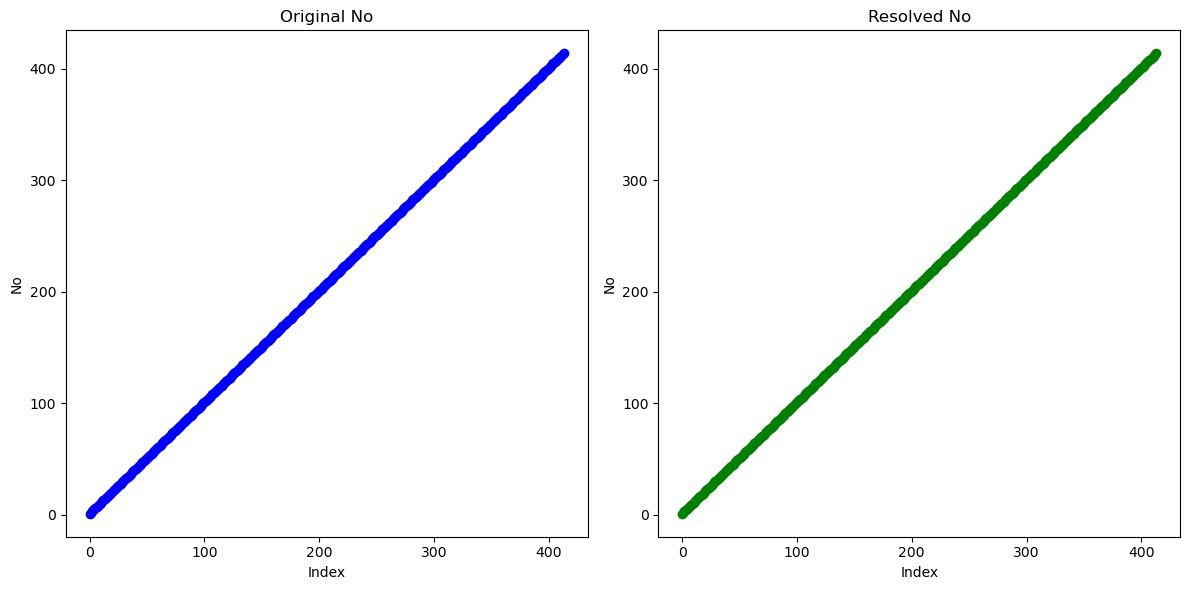

Feature: X1 transaction date, Lower Bound: 2012.167, Upper Bound: 2014.167


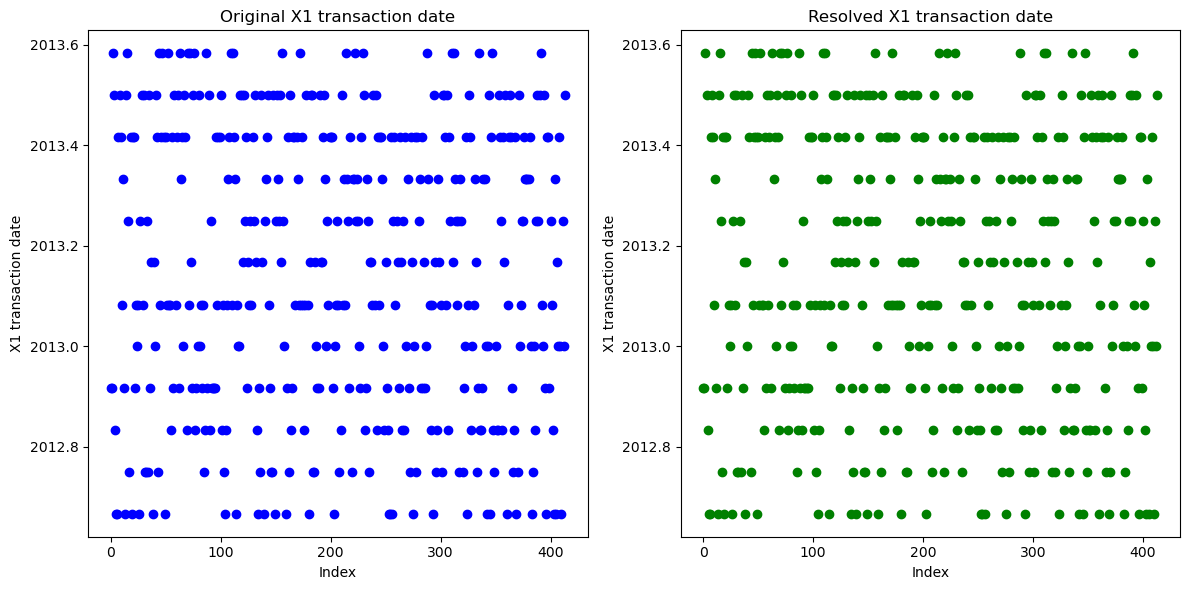

Feature: X2 house age, Lower Bound: -16.95, Upper Bound: 57.05


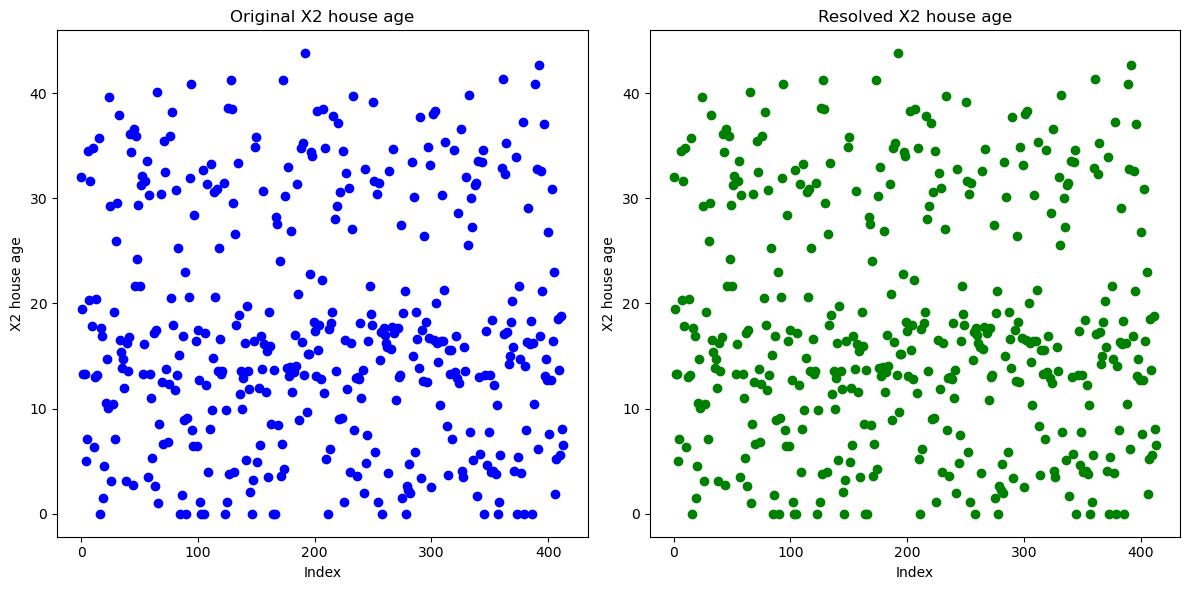

Feature: X3 distance to the nearest MRT station, Lower Bound: -1458.1065000000003, Upper Bound: 3201.7103


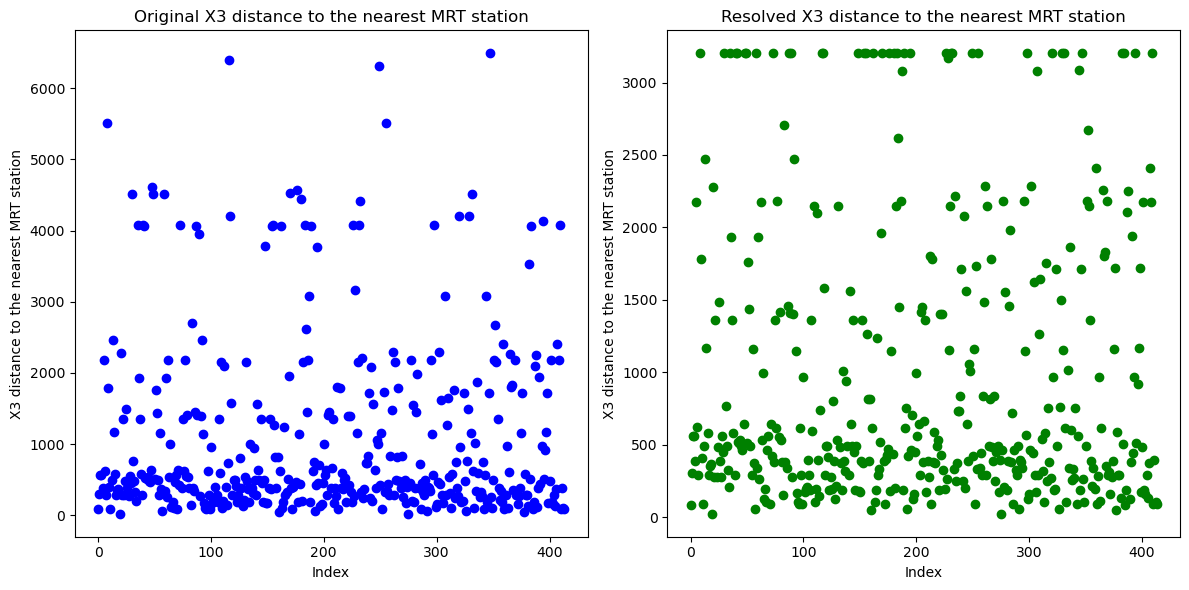

Feature: X4 number of convenience stores, Lower Bound: -3.0, Upper Bound: 13.0


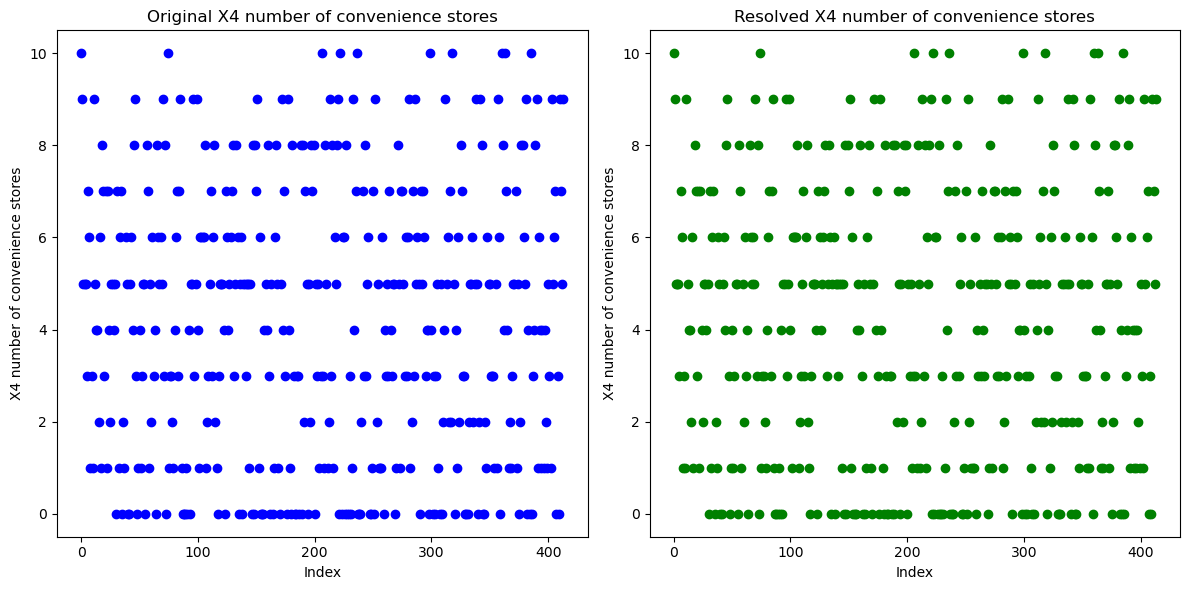

Feature: X5 latitude, Lower Bound: 24.941317500000004, Upper Bound: 24.999137499999996


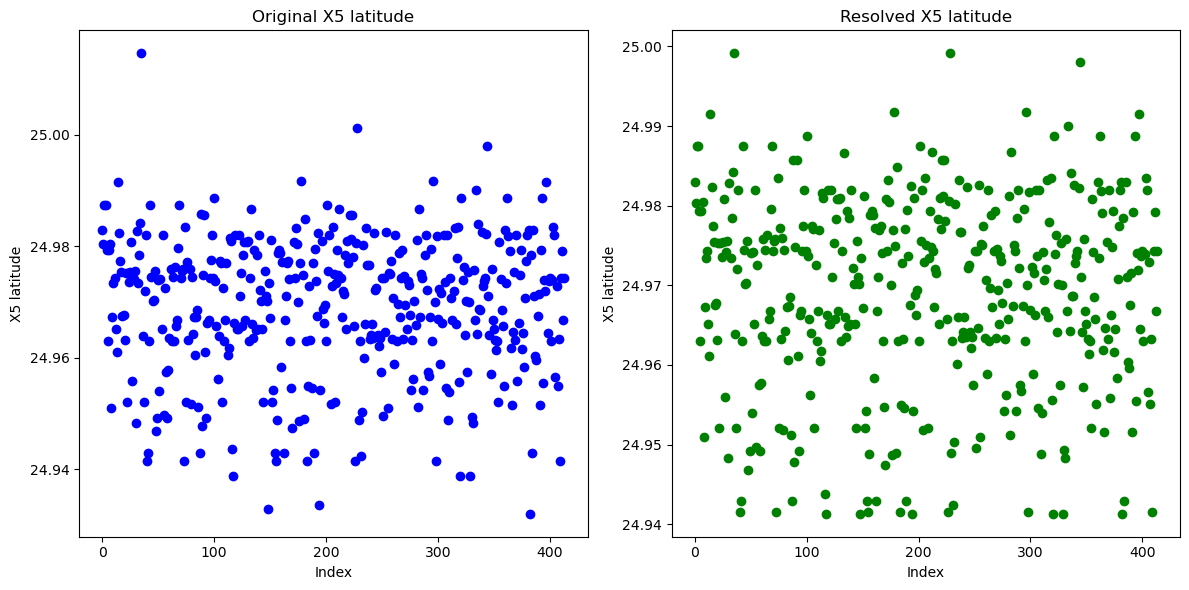

Feature: X6 longitude, Lower Bound: 121.505255, Upper Bound: 121.566135


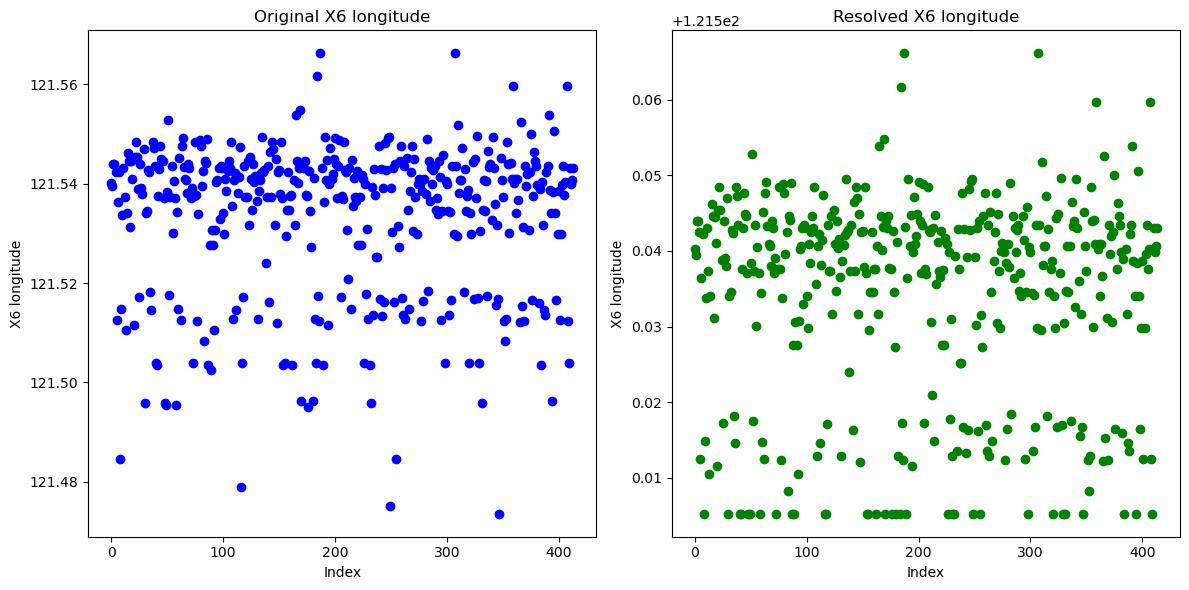

Feature: Y house price of unit area, Lower Bound: -0.6500000000000021, Upper Bound: 74.95


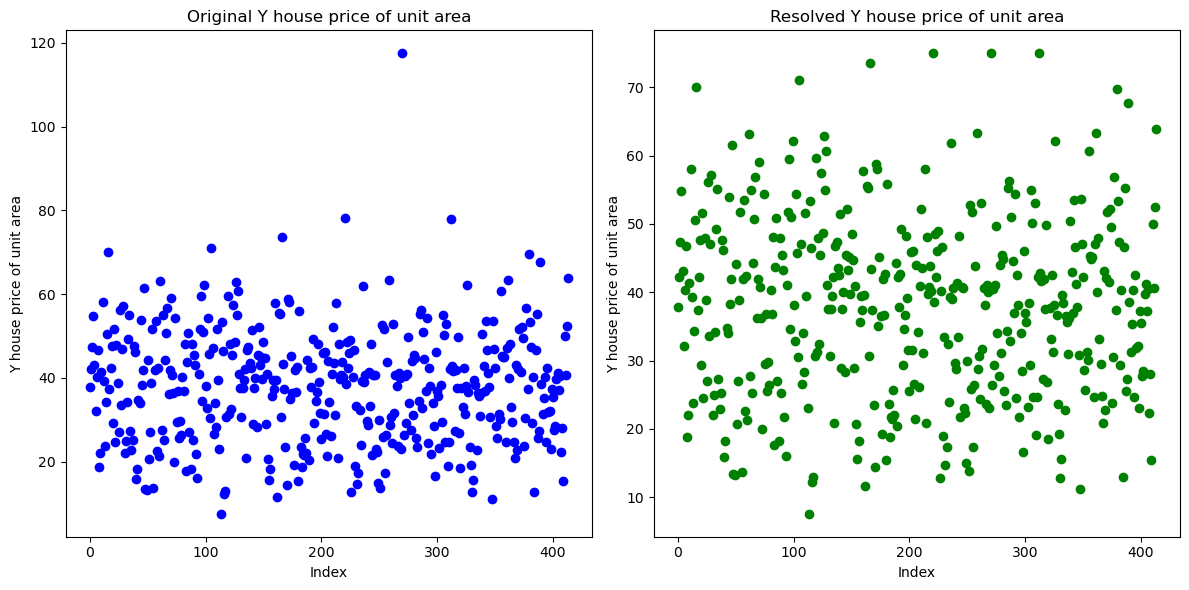

In [10]:
# detect, resolve and visualize outliers

df = detect_and_resolve_outliers(df)

In [11]:
df.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,974.545851,4.094203,24.969067,121.533974,37.861957
std,119.655756,0.281967,11.392485,968.915855,2.945562,0.012080,0.013779,13.112035
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.941318,121.505255,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,3201.710300,10.000000,24.999137,121.566135,74.950000


In [12]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1.0,2012.917,32.0,84.87882,10.0,24.98298,121.54024,37.9
1,2.0,2012.917,19.5,306.59470,9.0,24.98034,121.53951,42.2
2,3.0,2013.583,13.3,561.98450,5.0,24.98746,121.54391,47.3
3,4.0,2013.500,13.3,561.98450,5.0,24.98746,121.54391,54.8
4,5.0,2012.833,5.0,390.56840,5.0,24.97937,121.54245,43.1


### Outliers Resolved Successfully. I will now check for Skewness

## Handling Skewness

In [13]:
# First create a function that detects and visualise skewness

def detect_and_visualize_skewness(dataframe):
    # Detect and visualize skewness for all numeric features in the DataFrame
    
    skewness_results = []
    
    for feature in dataframe.select_dtypes(include=[np.number]).columns:
        original_data = dataframe[feature]
        
        # Calculate skewness
        skewness = skew(original_data)
        
        
        # Plot the original distribution
        plt.figure(figsize=(14, 6))
        sns.kdeplot(original_data, color='blue')
        plt.title(f'Original Density Plot of {feature}')
        plt.xlabel(feature)
        plt.ylabel('Density')
        plt.show()
        print(f"Feature: {feature}, Skewness: {skewness}")
        # Append the feature and its skewness to the results list
        skewness_results.append((feature, skewness))
    
    return skewness_results

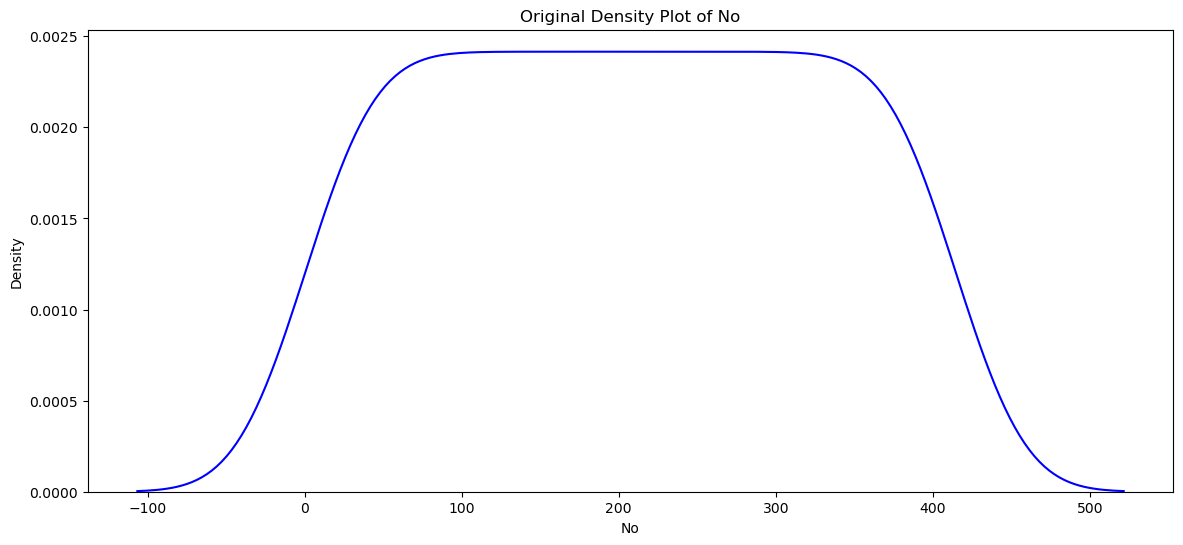

Feature: No, Skewness: 0.0


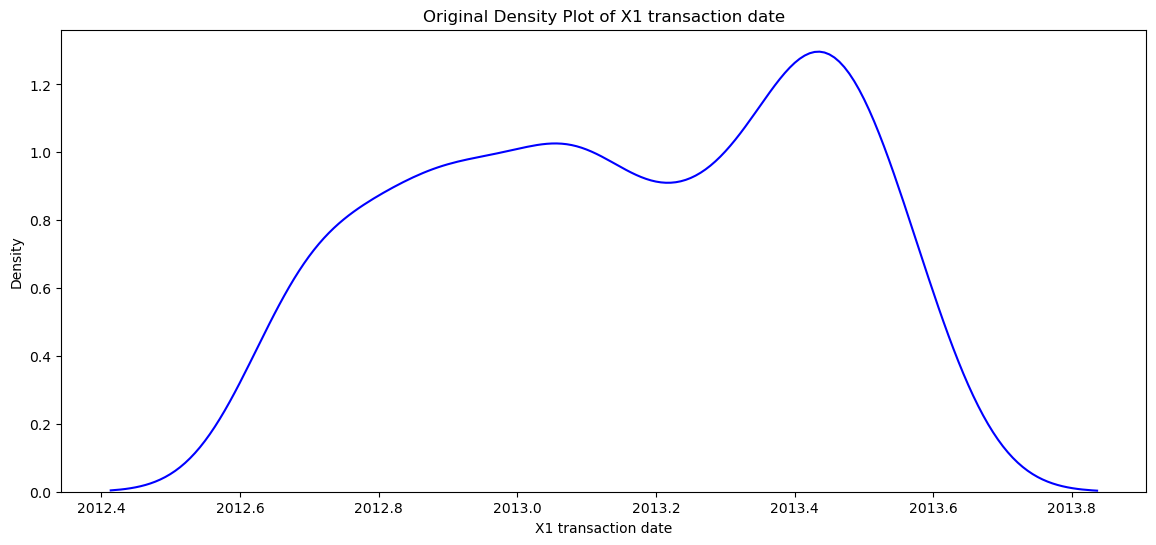

Feature: X1 transaction date, Skewness: -0.15002569058919962


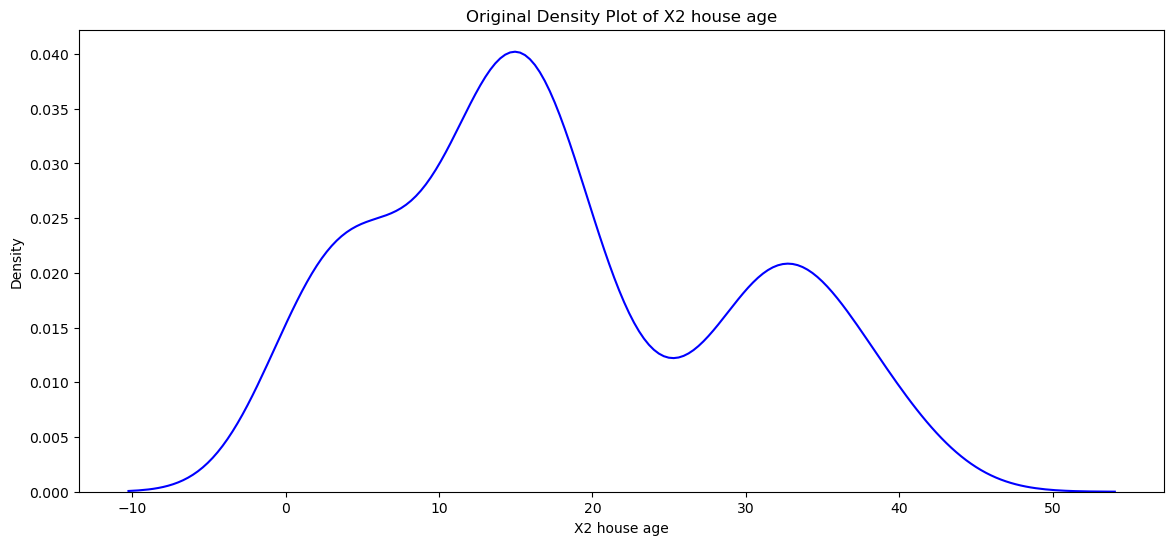

Feature: X2 house age, Skewness: 0.38153741817729087


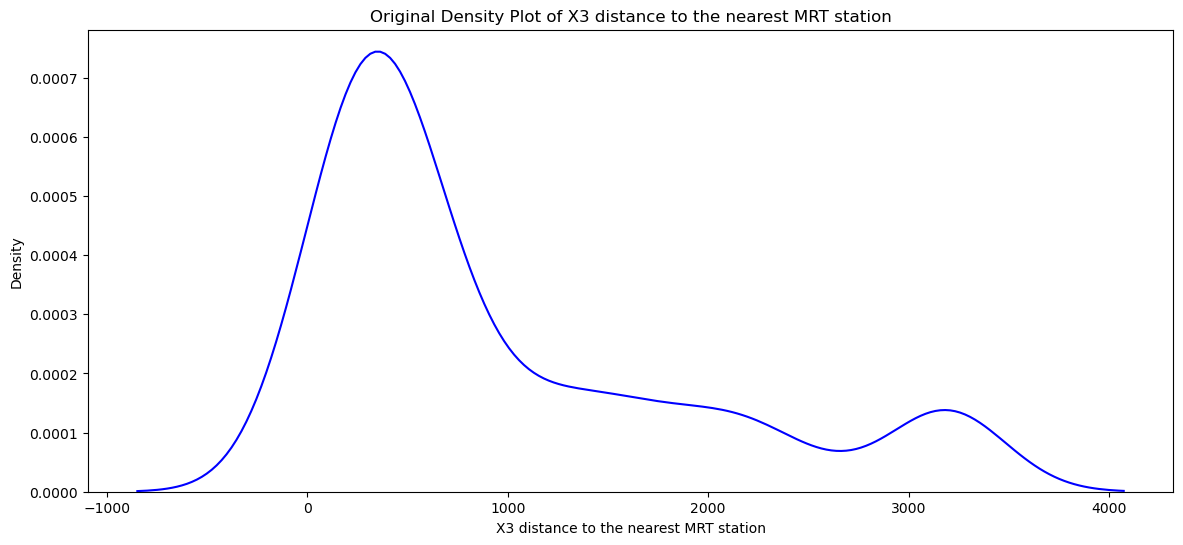

Feature: X3 distance to the nearest MRT station, Skewness: 1.2120609791385797


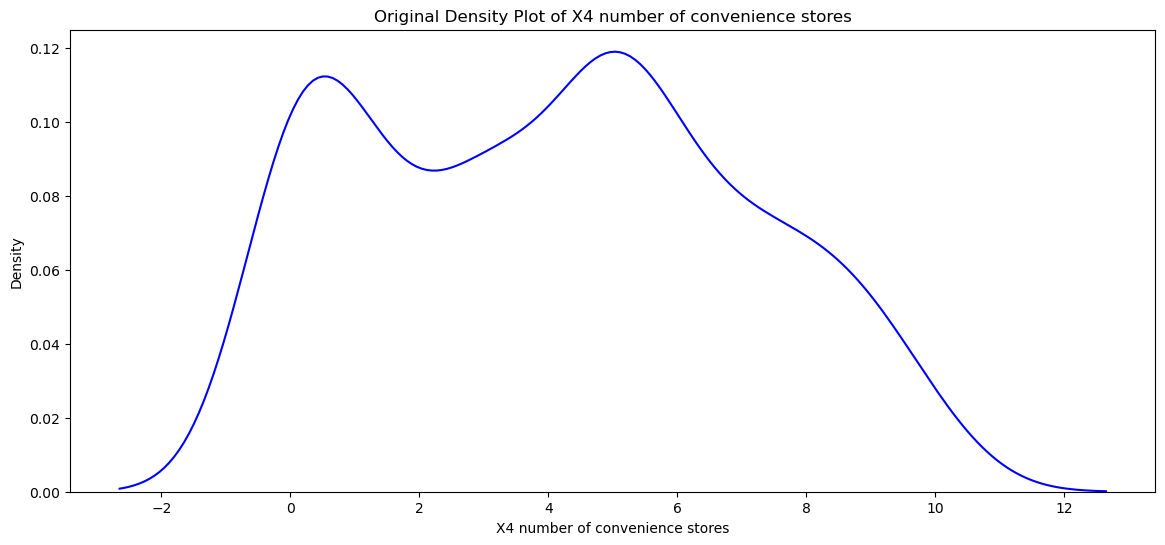

Feature: X4 number of convenience stores, Skewness: 0.1540458341286463


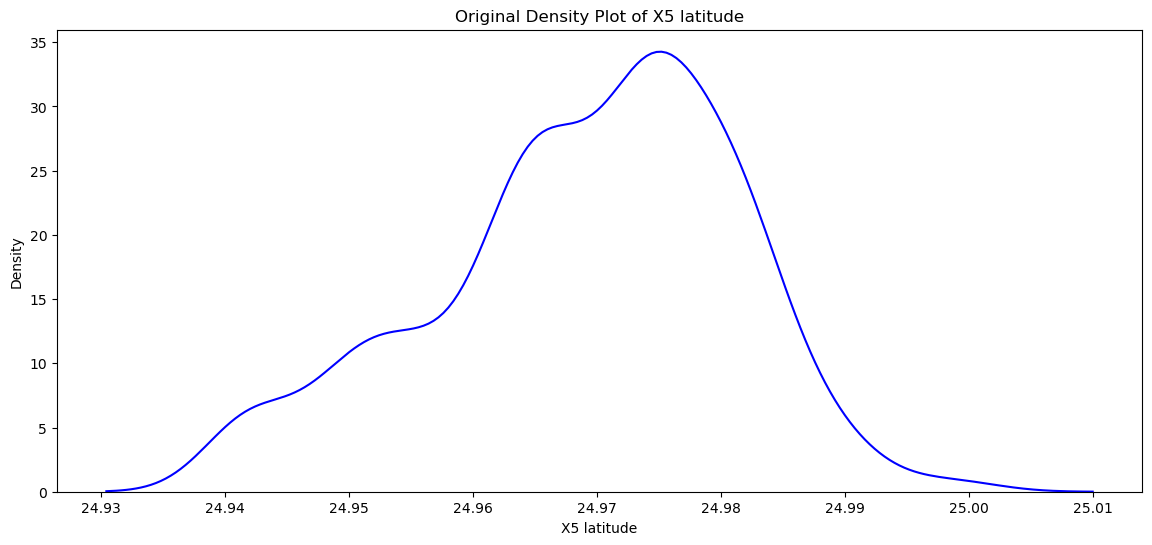

Feature: X5 latitude, Skewness: -0.45064567311216475


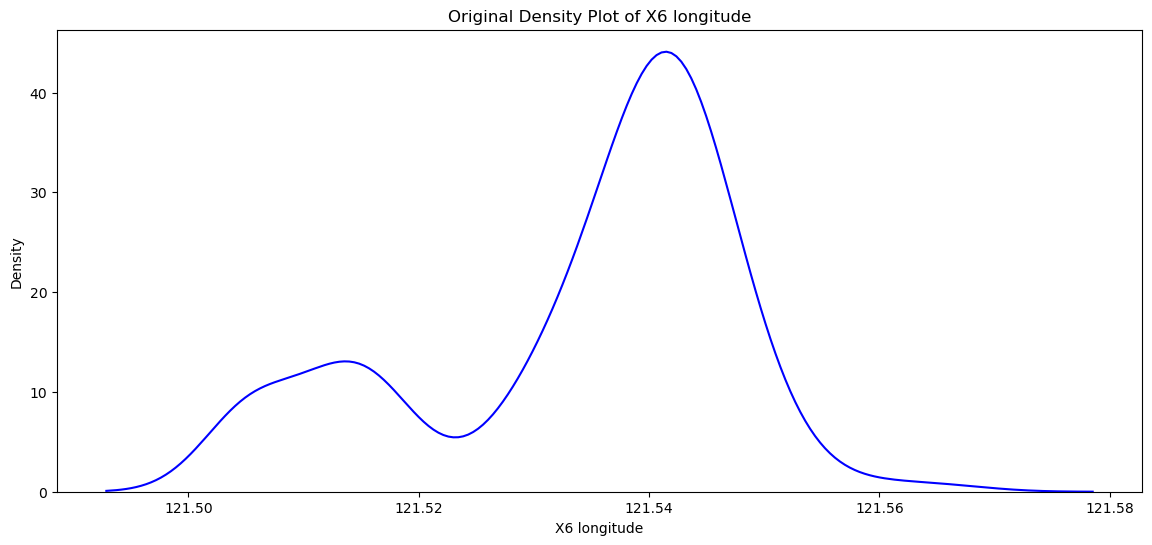

Feature: X6 longitude, Skewness: -0.8148707677911987


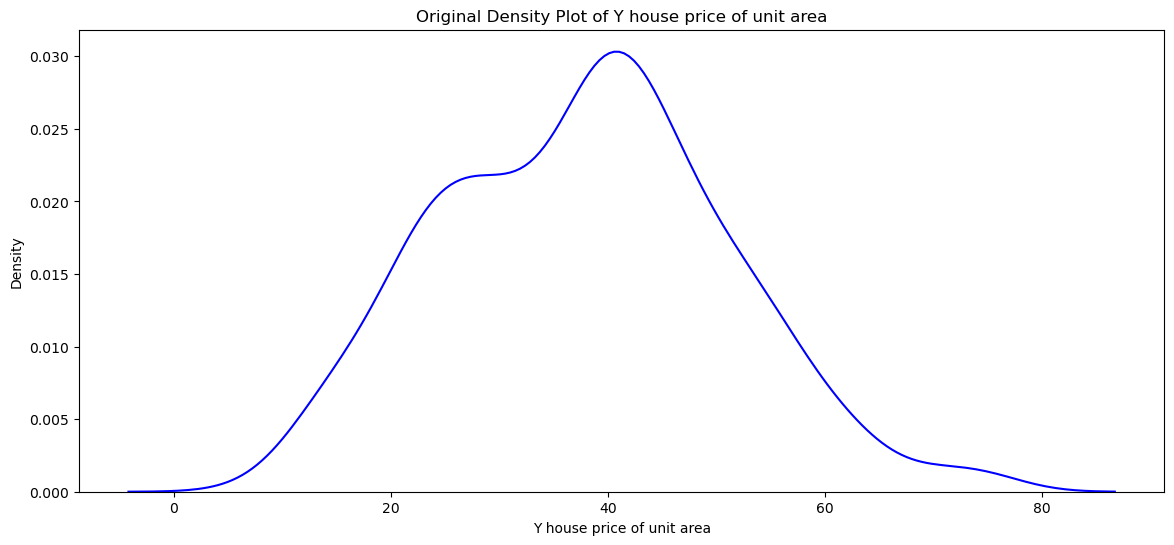

Feature: Y house price of unit area, Skewness: 0.1778157872613634


[('No', 0.0),
 ('X1 transaction date', -0.15002569058919962),
 ('X2 house age', 0.38153741817729087),
 ('X3 distance to the nearest MRT station', 1.2120609791385797),
 ('X4 number of convenience stores', 0.1540458341286463),
 ('X5 latitude', -0.45064567311216475),
 ('X6 longitude', -0.8148707677911987),
 ('Y house price of unit area', 0.1778157872613634)]

In [14]:
# Show skewness value and visualize skewness

detect_and_visualize_skewness(df)

In [15]:
# Second create a function that handles the skewness and visualize the transformed skewness

def transform_skewness(data, feature):
    """Apply appropriate transformations to resolve skewness."""
    original_data = data[feature]
    skewness = skew(original_data)
    
    # Apply transformations if necessary
    transformed_data = original_data.copy()
    transformation_used = None

    try:
        if skewness > 0.5:  # Positive skew
            if (original_data > 0).all():
                transformed_data, _ = boxcox(original_data + 1)  # Box-Cox for positive values
                transformation_used = 'Box-Cox'
            else:
                transformed_data = np.log1p(original_data)  # Log transformation
                transformation_used = 'Log'
        elif skewness < -0.5:  # Negative skew
            transformed_data, _ = yeojohnson(original_data)  # Yeo-Johnson handles both positive and negative skew
            transformation_used = 'Yeo-Johnson'
        else:
            transformation_used = 'No Transformation'
    except Exception as e:
        print(f"Error applying Box-Cox transformation to feature '{feature}': {e}")
        print("Applying Log transformation instead.")
        transformed_data = np.log1p(original_data)  # Fallback to log transformation
        transformation_used = 'Log (Fallback)'

    new_skewness = skew(transformed_data)

    return transformed_data, transformation_used, skewness, new_skewness

def visualize_feature_distributions(transformed_data, feature, transformation_used):
    """Visualize transformed data with density plots."""
    plt.figure(figsize=(7, 6))
    sns.kdeplot(transformed_data, color='green')
    plt.title(f'Transformed Density Plot of {feature} ({transformation_used})')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.tight_layout()
    plt.show()

def resolve_skewness(dataframe, exempt_columns=None):
    """Resolve skewness and visualize results for all numeric features in the DataFrame, exempting specified columns."""
    if exempt_columns is None:
        exempt_columns = []
    
    for feature in dataframe.select_dtypes(include=[np.number]).columns:
        if feature in exempt_columns:
            print(f"Feature '{feature}' is exempt from transformation.")
            continue
        
        original_data = dataframe[feature]
        
        # Transform skewness
        transformed_data, transformation_used, skewness, new_skewness = transform_skewness(dataframe, feature)
        
        if transformation_used and transformation_used != 'No Transformation':  # Only update DataFrame if a transformation was applied
            dataframe[feature] = transformed_data

        # Visualize the transformed feature distribution
        visualize_feature_distributions(dataframe[feature], feature, transformation_used)
        
        # Print original and new skewness values
        print(f"Feature: {feature}, Skewness before transformation: {skewness:.4f}, Skewness after transformation: {new_skewness:.4f}")

    return dataframe

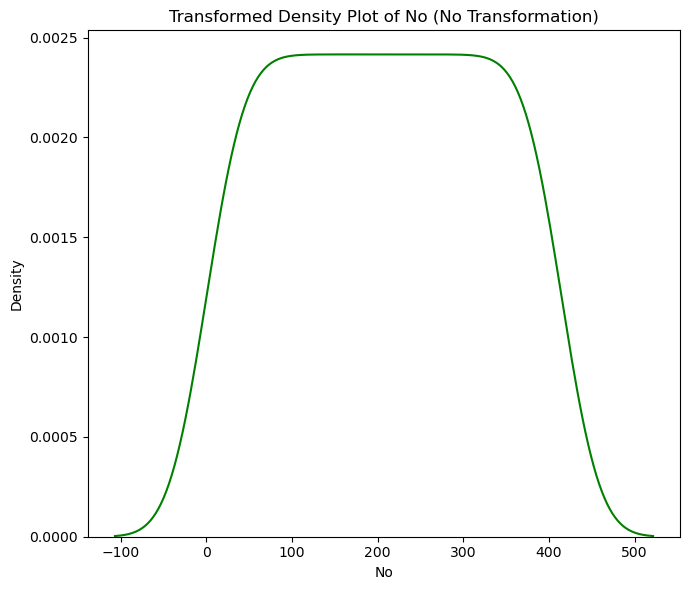

Feature: No, Skewness before transformation: 0.0000, Skewness after transformation: 0.0000


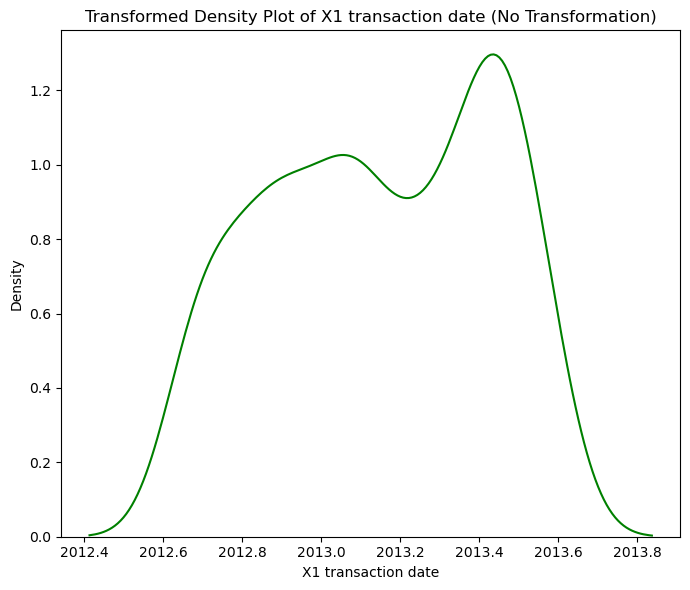

Feature: X1 transaction date, Skewness before transformation: -0.1500, Skewness after transformation: -0.1500


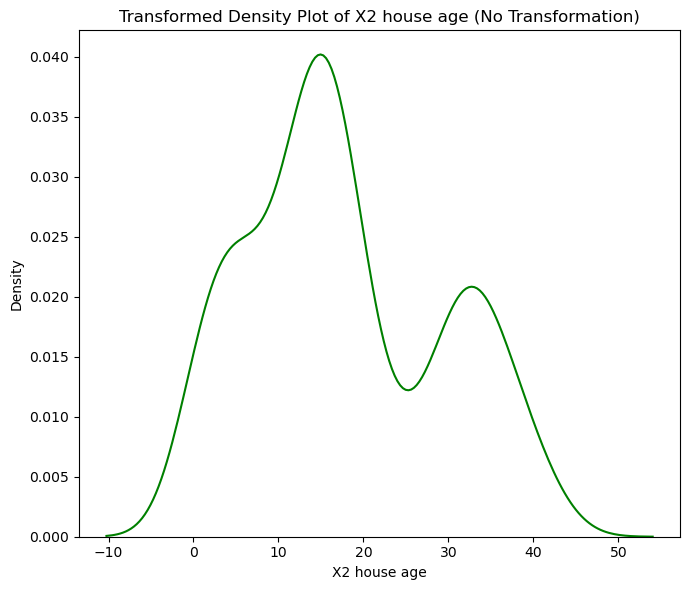

Feature: X2 house age, Skewness before transformation: 0.3815, Skewness after transformation: 0.3815
Feature 'X3 distance to the nearest MRT station' is exempt from transformation.


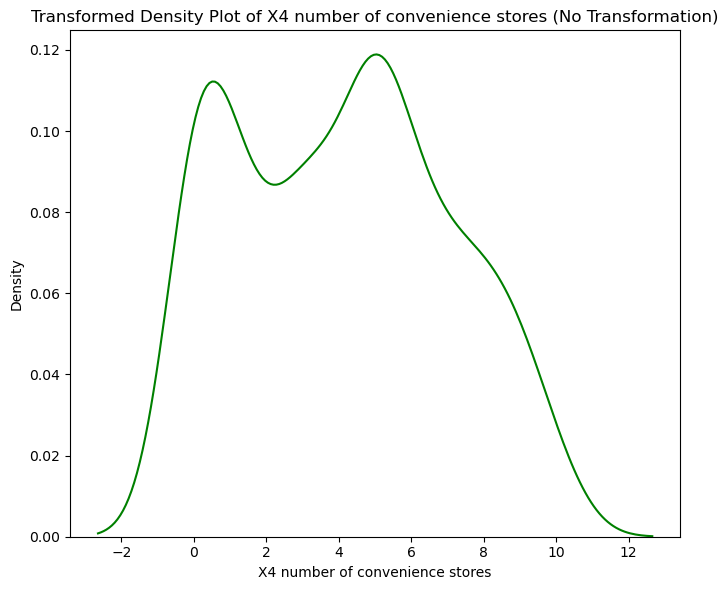

Feature: X4 number of convenience stores, Skewness before transformation: 0.1540, Skewness after transformation: 0.1540


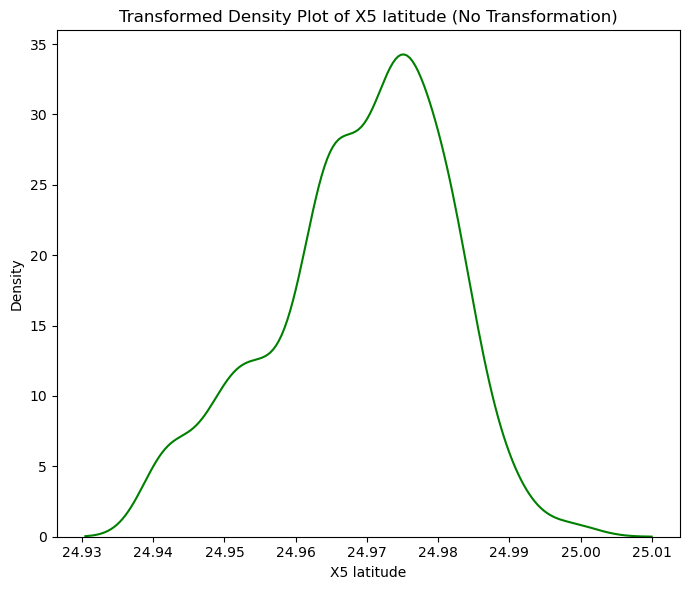

Feature: X5 latitude, Skewness before transformation: -0.4506, Skewness after transformation: -0.4506
Feature 'X6 longitude' is exempt from transformation.


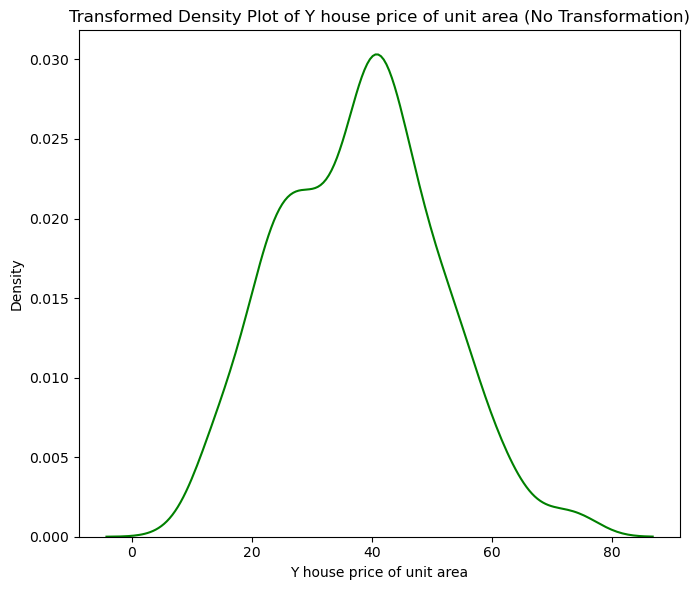

Feature: Y house price of unit area, Skewness before transformation: 0.1778, Skewness after transformation: 0.1778


In [16]:
# resolve and visualize skewness
# due to the nature of the data set, i will exempt some features from being resolved so as to preserve their original values which is vitual for the prediction
df = resolve_skewness(df, exempt_columns = ["X3 distance to the nearest MRT station", "X6 longitude"])

In [17]:
df.head(20)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1.0,2012.917,32.0,84.87882,10.0,24.98298,121.540240,37.9
1,2.0,2012.917,19.5,306.59470,9.0,24.98034,121.539510,42.2
2,3.0,2013.583,13.3,561.98450,5.0,24.98746,121.543910,47.3
3,4.0,2013.500,13.3,561.98450,5.0,24.98746,121.543910,54.8
4,5.0,2012.833,5.0,390.56840,5.0,24.97937,121.542450,43.1
5,6.0,2012.667,7.1,2175.03000,3.0,24.96305,121.512540,32.1
6,7.0,2012.667,34.5,623.47310,7.0,24.97933,121.536420,40.3
7,8.0,2013.417,20.3,287.60250,6.0,24.98042,121.542280,46.7
8,9.0,2013.500,31.7,3201.71030,1.0,24.95095,121.505255,18.8
9,10.0,2013.417,17.9,1783.18000,3.0,24.96731,121.514860,22.1


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    float64
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    float64
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(8)
memory usage: 26.0 KB


### Skewness Resolved Successfully. I will now proceed to Resolve the Date arrangement of the dataset

## Handling Date Format, Renaming and Deleting Unwanted Columns

In [19]:
# First create a function to convert decimal year to standard date format

def convert_decimal_year(decimal_year):
    year = int(decimal_year)
    remainder = decimal_year - year
    
    # Determine if it's a leap year (366 days) or a regular year (365 days)
    days_in_year = 366 if year % 4 == 0 and (year % 100 != 0 or year % 400 == 0) else 365
    
    # Calculate the number of days from the remainder
    days = remainder * days_in_year
    
    # Add the days to January 1st of the given year
    date = datetime.datetime(year, 1, 1) + datetime.timedelta(days=days)
    
    return date

In [20]:
# Next we apply the function to X1 transaction date column

df['X1 transaction date'] = df['X1 transaction date'].apply(convert_decimal_year)

# For X2 house age, only the year should be what we need 
df["X2 house age"] = df['X2 house age'].astype(int)


df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1.0,2012-12-01 14:55:40.799997,32,84.87882,10.0,24.98298,121.54024,37.9
1,2.0,2012-12-01 14:55:40.799997,19,306.59470,9.0,24.98034,121.53951,42.2
2,3.0,2013-08-01 19:04:48.000003,13,561.98450,5.0,24.98746,121.54391,47.3
3,4.0,2013-07-02 12:00:00.000000,13,561.98450,5.0,24.98746,121.54391,54.8
4,5.0,2012-10-31 21:04:19.200003,5,390.56840,5.0,24.97937,121.54245,43.1


In [21]:
# Extract year, month, and day into separate columns

df['Year of Transaction'] = df['X1 transaction date'].dt.year
df['Month of Transaction'] = df['X1 transaction date'].dt.month
df['Day of Transaction'] = df['X1 transaction date'].dt.day


# Rearrange columns to keep them close to the original column

columns_order = ['No', 'X1 transaction date', 'Year of Transaction', 'Month of Transaction', 'Day of Transaction']

# Filter out the columns not in columns_order and concatenate them to column_order 
columns_order += [col for col in df.columns if col not in columns_order]
df = df[columns_order]


df.head()

,No,X1 transaction date,Year of Transaction,Month of Transaction,Day of Transaction,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1.0,2012-12-01 14:55:40.799997,2012,12,1,32,84.87882,10.0,24.98298,121.54024,37.9
1,2.0,2012-12-01 14:55:40.799997,2012,12,1,19,306.59470,9.0,24.98034,121.53951,42.2
2,3.0,2013-08-01 19:04:48.000003,2013,8,1,13,561.98450,5.0,24.98746,121.54391,47.3
3,4.0,2013-07-02 12:00:00.000000,2013,7,2,13,561.98450,5.0,24.98746,121.54391,54.8
4,5.0,2012-10-31 21:04:19.200003,2012,10,31,5,390.56840,5.0,24.97937,121.54245,43.1


### Having successfully resolved the X1 transaction Date and X2 house age date format, I will now rename the column names so they look more presentable

In [22]:
# Create a dictionary mapping old column names to new column names

rename_dict = {
    'X1 transaction date': 'Transaction Date',
    'X2 house age': 'House Age',
    'X3 distance to the nearest MRT station': 'Distance to the Nearest MRT Station',
    'X4 number of convenience stores': 'Number of Convenience Stores',
    'X5 latitude': 'Latitude',
    'X6 longitude': 'Longitude',
    'Y house price of unit area': 'House Price of Unit Area'
}

# Rename columns using the dictionary
df = df.rename(columns=rename_dict)


df.head()

,No,Transaction Date,Year of Transaction,Month of Transaction,Day of Transaction,House Age,Distance to the Nearest MRT Station,Number of Convenience Stores,Latitude,Longitude,House Price of Unit Area
0,1.0,2012-12-01 14:55:40.799997,2012,12,1,32,84.87882,10.0,24.98298,121.54024,37.9
1,2.0,2012-12-01 14:55:40.799997,2012,12,1,19,306.59470,9.0,24.98034,121.53951,42.2
2,3.0,2013-08-01 19:04:48.000003,2013,8,1,13,561.98450,5.0,24.98746,121.54391,47.3
3,4.0,2013-07-02 12:00:00.000000,2013,7,2,13,561.98450,5.0,24.98746,121.54391,54.8
4,5.0,2012-10-31 21:04:19.200003,2012,10,31,5,390.56840,5.0,24.97937,121.54245,43.1


### Finally i will drop the columns which are not needed in the dataset then proceed to carry out Bivariate Analysis

In [23]:
df = df.drop("No", axis= 1)
df = df.drop("Transaction Date" , axis= 1)
df["Number of Convenience Stores"] = df["Number of Convenience Stores"].astype(int)

df.head()

,Year of Transaction,Month of Transaction,Day of Transaction,House Age,Distance to the Nearest MRT Station,Number of Convenience Stores,Latitude,Longitude,House Price of Unit Area
0,2012,12,1,32,84.87882,10,24.98298,121.54024,37.9
1,2012,12,1,19,306.59470,9,24.98034,121.53951,42.2
2,2013,8,1,13,561.98450,5,24.98746,121.54391,47.3
3,2013,7,2,13,561.98450,5,24.98746,121.54391,54.8
4,2012,10,31,5,390.56840,5,24.97937,121.54245,43.1


## Bivariate Analysis 

### I will now do a comparison between some key features in the dataset using various visualization tools

### Comparing the Relationship between Number of Convenience Stores and House Price of Unit Area

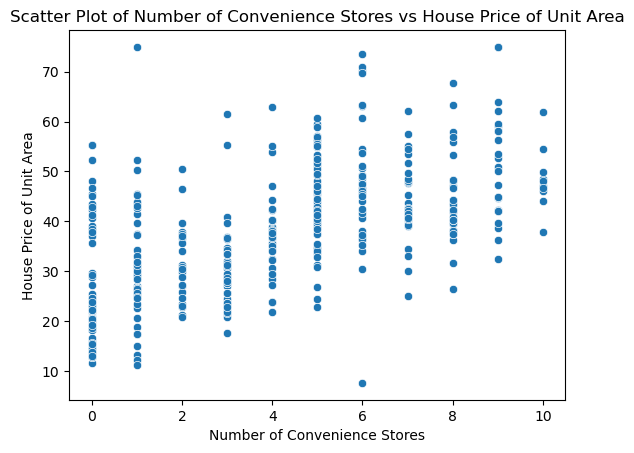

Pearson Correlation Coefficient: 0.60
Moderate positive linear correlation.


In [24]:
# First lets try Number of Convenience Stores and House Price of Unit Area

sns.scatterplot(data=df, x='Number of Convenience Stores', y='House Price of Unit Area')
plt.title('Scatter Plot of Number of Convenience Stores vs House Price of Unit Area')
plt.xlabel('Number of Convenience Stores')
plt.ylabel('House Price of Unit Area')
plt.show()

# Calculate Pearson correlation coefficient
correlation_coefficient, _ = pearsonr(df['Number of Convenience Stores'], df['House Price of Unit Area'])
print(f'Pearson Correlation Coefficient: {correlation_coefficient:.2f}')

# Interpretation based on the correlation coefficient
if correlation_coefficient > 0.7:
    print("Strong positive linear correlation.")
elif correlation_coefficient > 0.3:
    print("Moderate positive linear correlation.")
elif correlation_coefficient < -0.7:
    print("Strong negative linear correlation.")
elif correlation_coefficient < -0.3:
    print("Moderate negative linear correlation.")
else:
    print("Weak or no linear correlation.")

### Since we have a Moderate positive linear correlation, we can say that there is close relationship(Not so great) relationship between Number of Convenience Stores and House Price of Unit Area. This means that as the Number of Convenience Stores increases, the House Price of Unit Area also increases as well

### Comparing the Relationship Between Distance to the Nearest MRT Station and House Price of Unit Area

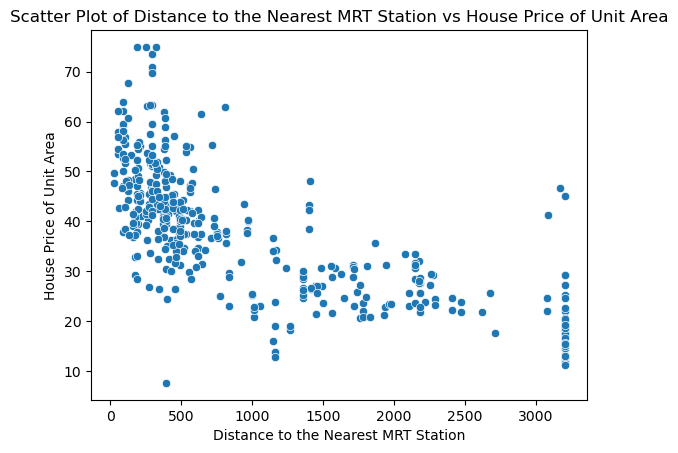

Pearson Correlation Coefficient: -0.72
Strong negative linear correlation.


In [25]:
# Lets try Distance to the Nearest MRT Station and House Price of Unit Area

sns.scatterplot(data=df, x='Distance to the Nearest MRT Station', y='House Price of Unit Area')
plt.title('Scatter Plot of Distance to the Nearest MRT Station vs House Price of Unit Area')
plt.xlabel('Distance to the Nearest MRT Station')
plt.ylabel('House Price of Unit Area')
plt.show()

# Calculate Pearson correlation coefficient
correlation_coefficient, _ = pearsonr(df['Distance to the Nearest MRT Station'], df['House Price of Unit Area'])
print(f'Pearson Correlation Coefficient: {correlation_coefficient:.2f}')

# Interpretation based on the correlation coefficient
if correlation_coefficient > 0.7:
    print("Strong positive linear correlation.")
elif correlation_coefficient > 0.3:
    print("Moderate positive linear correlation.")
elif correlation_coefficient < -0.7:
    print("Strong negative linear correlation.")
elif correlation_coefficient < -0.3:
    print("Moderate negative linear correlation.")
else:
    print("Weak or no linear correlation.")

### Since we have a Strong Negative linear correlation, we can say that there is a very close relationship relationship between Distance to the Nearest MRT Station and House Price of Unit Area. This means that as the Distance to the Nearest MRT Station increases, the House Price of Unit Area reduces.

### Comparing the Relationship Between House Age and House Price of Unit Area

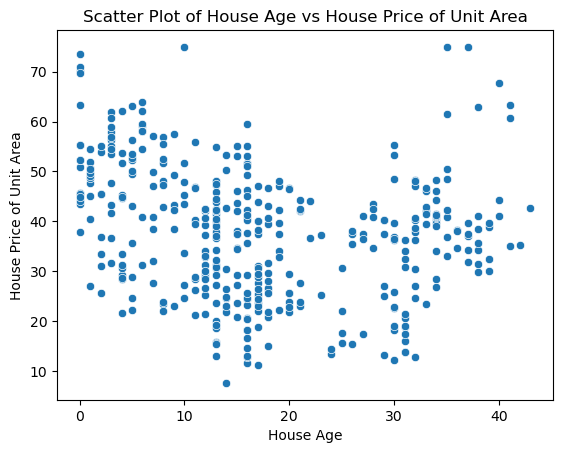

Pearson Correlation Coefficient: -0.22
Weak or no linear correlation.


In [26]:
# Lets try Distance to the House Age and House Price of Unit Area

sns.scatterplot(data=df, x='House Age', y='House Price of Unit Area')
plt.title('Scatter Plot of House Age vs House Price of Unit Area')
plt.xlabel('House Age')
plt.ylabel('House Price of Unit Area')
plt.show()

# Calculate Pearson correlation coefficient
correlation_coefficient, _ = pearsonr(df['House Age'], df['House Price of Unit Area'])
print(f'Pearson Correlation Coefficient: {correlation_coefficient:.2f}')

# Interpretation based on the correlation coefficient
if correlation_coefficient > 0.7:
    print("Strong positive linear correlation.")
elif correlation_coefficient > 0.3:
    print("Moderate positive linear correlation.")
elif correlation_coefficient < -0.7:
    print("Strong negative linear correlation.")
elif correlation_coefficient < -0.3:
    print("Moderate negative linear correlation.")
else:
    print("Weak or no linear correlation.")

### Since we have a weak or no linear correlation, we can say that there is a very weak relationship relationship between House Age and House Price of Unit Area. This means that the House Age does not really affect(to a large extent) the change in House Price of Unit Area.

### Visualize House Price of Unit Area by Location(Latitude and Longitude)

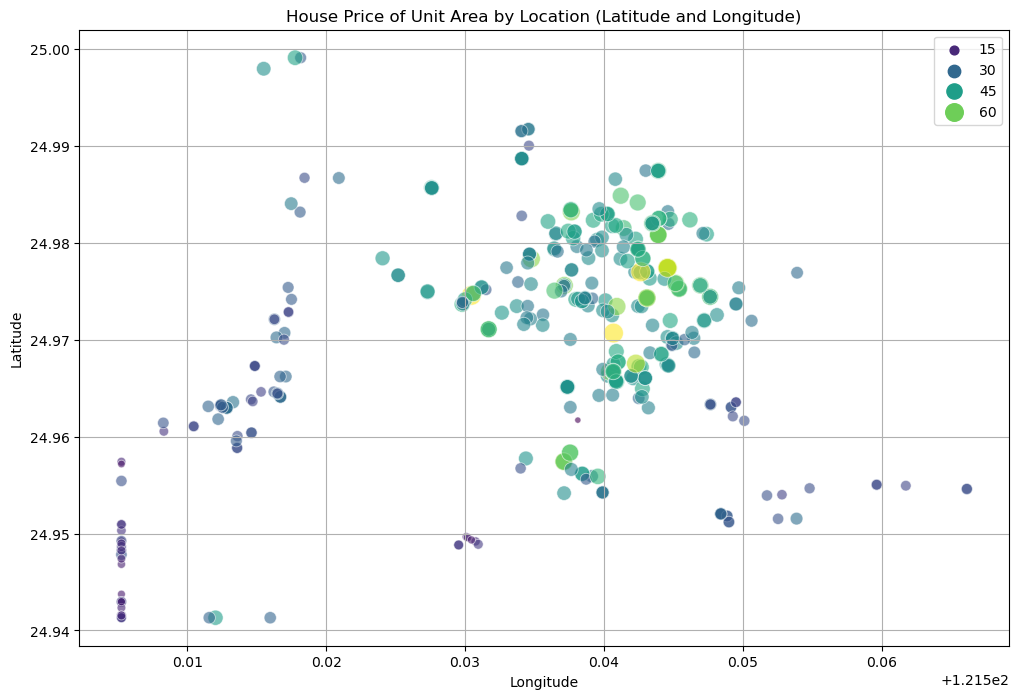

In [27]:
# Scatter plot with color and size representing house price per unit area
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='Longitude', 
    y='Latitude', 
    size='House Price of Unit Area', 
    hue='House Price of Unit Area',
    sizes=(20, 200), 
    palette='viridis',
    data=df, 
    alpha=0.6
)

plt.title('House Price of Unit Area by Location (Latitude and Longitude)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

### From the Scatter plot, we can say that the more expensive houses are located in the same geographical location or area and are close to each other compared to the less expensive houses which seem to be scattered accross different locations.

### Visualize House Age by Location(Latitude and Longitude)

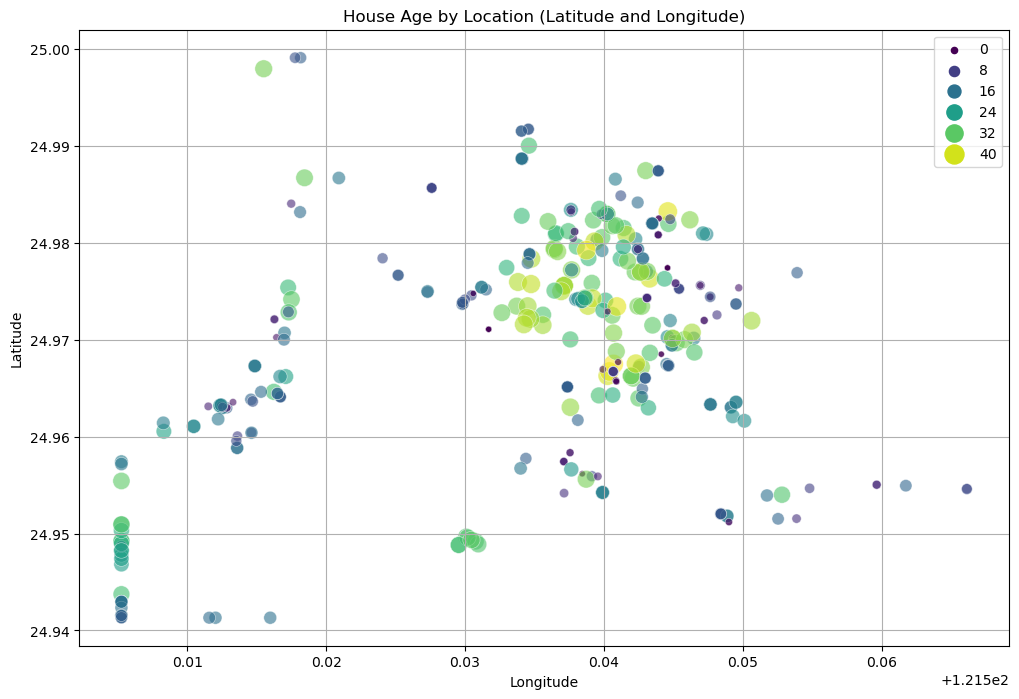

In [28]:
# Scatter plot with color and size representing House Age
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='Longitude', 
    y='Latitude', 
    size='House Age', 
    hue='House Age',
    sizes=(20, 200), 
    palette='viridis',
    data=df, 
    alpha=0.6
)

plt.title('House Age by Location (Latitude and Longitude)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

### From the Scatter plot, we seem to have a more even distribution for House Age. The Old and New houses seem to located accross several geographical locations. 

### Visualize Distance to the Nearest MRT Station by Location(Latitude and Longitude)

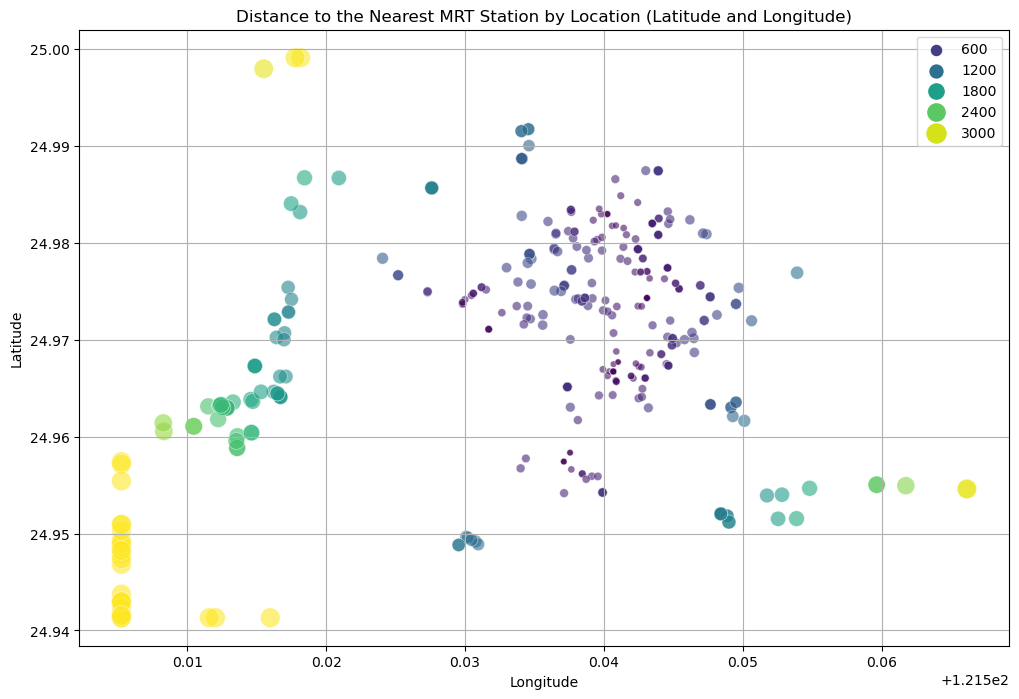

In [29]:
# Scatter plot with color and size representing Distance to the Nearest MRT Station
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='Longitude', 
    y='Latitude', 
    size='Distance to the Nearest MRT Station', 
    hue='Distance to the Nearest MRT Station',
    sizes=(20, 200), 
    palette='viridis',
    data=df, 
    alpha=0.6
)

plt.title('Distance to the Nearest MRT Station by Location (Latitude and Longitude)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

### From the Scatter plot, we can say that Houses nearest to the MRT Station are located in the same geographical location or area and are close to each other. The houses that have longer distance from the MRT Station are quite distant from houses closer to the MRT station and are scattered through out different locations. 

### Visualize Number of Convenience by Location(Latitude and Longitude)

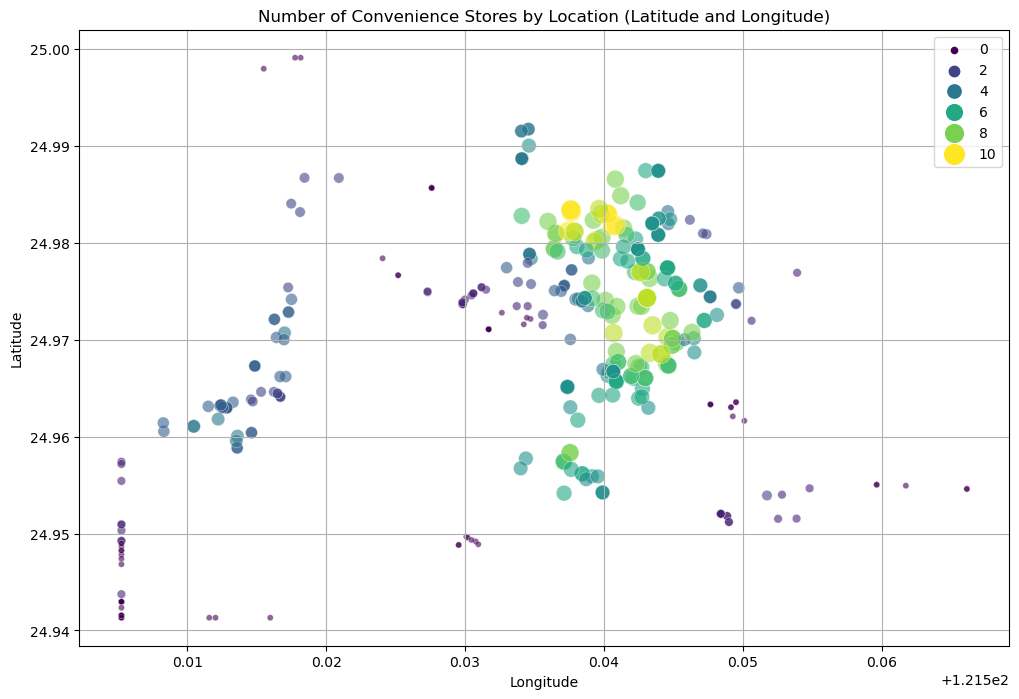

In [30]:
# Scatter plot with color and size representing Number of Convenience Stores
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='Longitude', 
    y='Latitude', 
    size='Number of Convenience Stores', 
    hue='Number of Convenience Stores',
    sizes=(20, 200), 
    palette='viridis',
    data=df, 
    alpha=0.6
)

plt.title('Number of Convenience Stores by Location (Latitude and Longitude)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

### From the Scatter plot, we can say that houses with the highest number of Convenience Stores are located close to each other. The houses with fewer Convenience Stores seem to be scattered accross different locations.

### Effect of Number of Convenience Stores on House Price of Unit Area

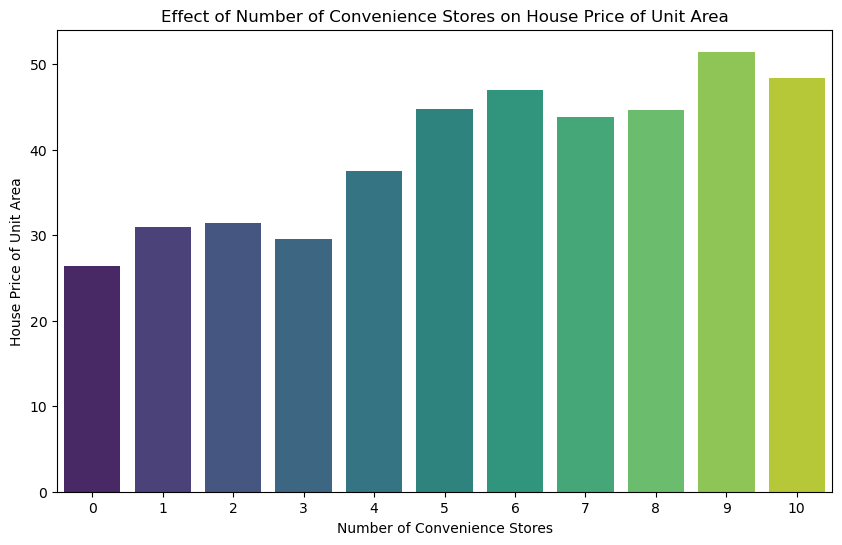

In [31]:
# Aggregate data by category to calculate the mean value for each category
df_grouped = df.groupby('Number of Convenience Stores')['House Price of Unit Area'].mean().reset_index()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Number of Convenience Stores', y='House Price of Unit Area', data=df_grouped, palette='viridis')
plt.title('Effect of Number of Convenience Stores on House Price of Unit Area')
plt.xlabel('Number of Convenience Stores')
plt.ylabel('House Price of Unit Area')
plt.show()

### As the Number of Convenience Stores increases, the House Price of Unit Area increase 

### Effect of Distance to the Nearest MRT Station on House Price of Unit Area

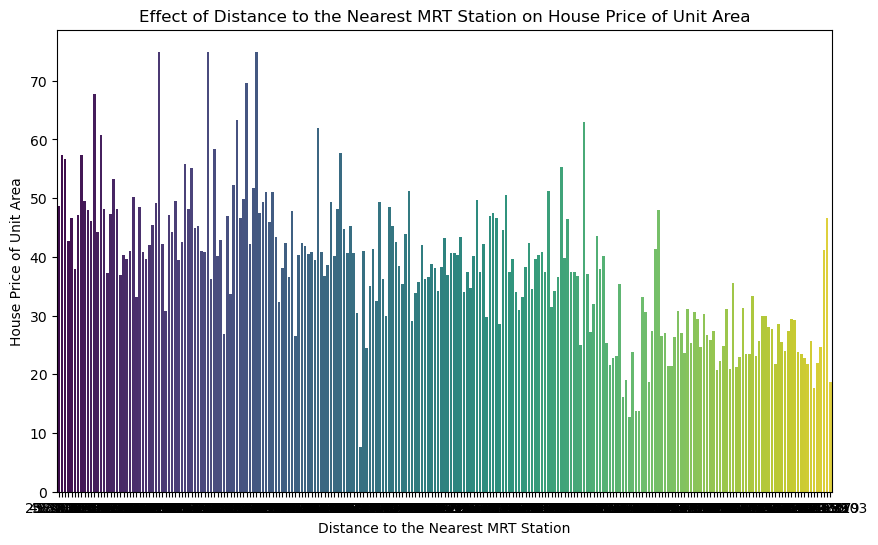

In [32]:
# Aggregate data by category to calculate the mean value for each category
df_grouped = df.groupby('Distance to the Nearest MRT Station')['House Price of Unit Area'].mean().reset_index()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Distance to the Nearest MRT Station', y='House Price of Unit Area', data=df_grouped, palette='viridis')
plt.title('Effect of Distance to the Nearest MRT Station on House Price of Unit Area')
plt.xlabel('Distance to the Nearest MRT Station')
plt.ylabel('House Price of Unit Area')
plt.show()

### As the Distance to the Nearest MRT Station increases, the House Price of Unit Area reduces 

### Effect of House Age on House Price of Unit Area

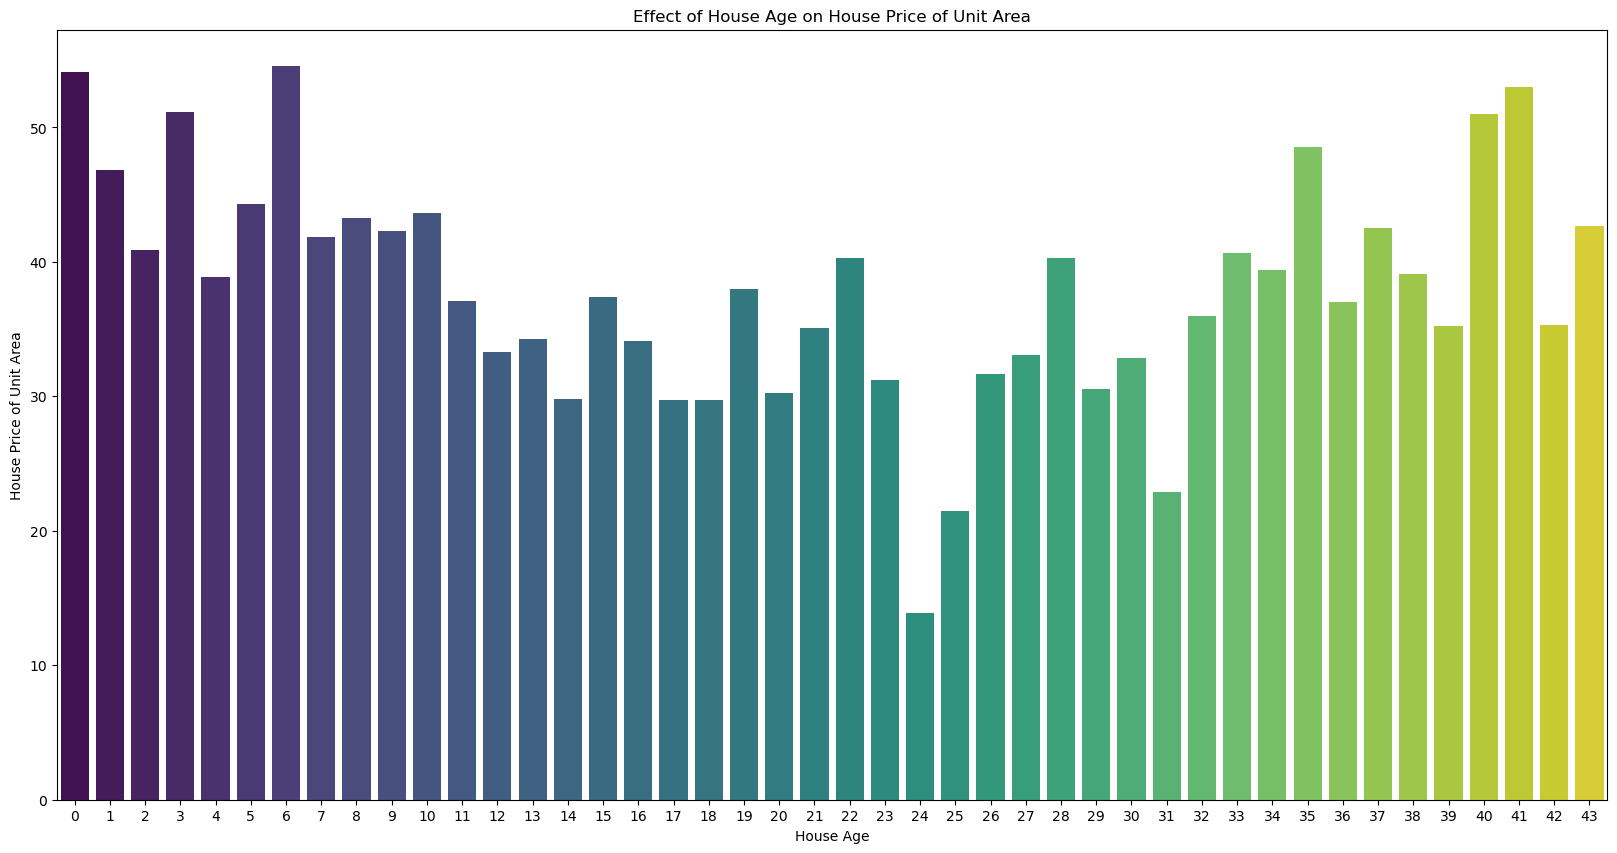

In [33]:
# Aggregate data by category to calculate the mean value for each category
df_grouped = df.groupby('House Age')['House Price of Unit Area'].mean().reset_index()

# Plotting the bar chart
plt.figure(figsize=(20, 10))
sns.barplot(x='House Age', y='House Price of Unit Area', data=df_grouped, palette='viridis')
plt.title('Effect of House Age on House Price of Unit Area')
plt.xlabel('House Age')
plt.ylabel('House Price of Unit Area')
plt.show()

### House Age has little to no effect on the House Price of Unit Area

### Final Observation: From my analysis of some key features in the data set, it can be said that the price of houses (in the location the data was compiled) is solely dependent on its location and accessibility to essential needs or facilities. The reason for this is because from the dataset, the more espensive houses are closer to those essential facilities. We can also say that people who live in this location prioritise accessibilty to their day to day needs when purchasing a house than any other factor.

## Correlation Matrix

<Axes: >

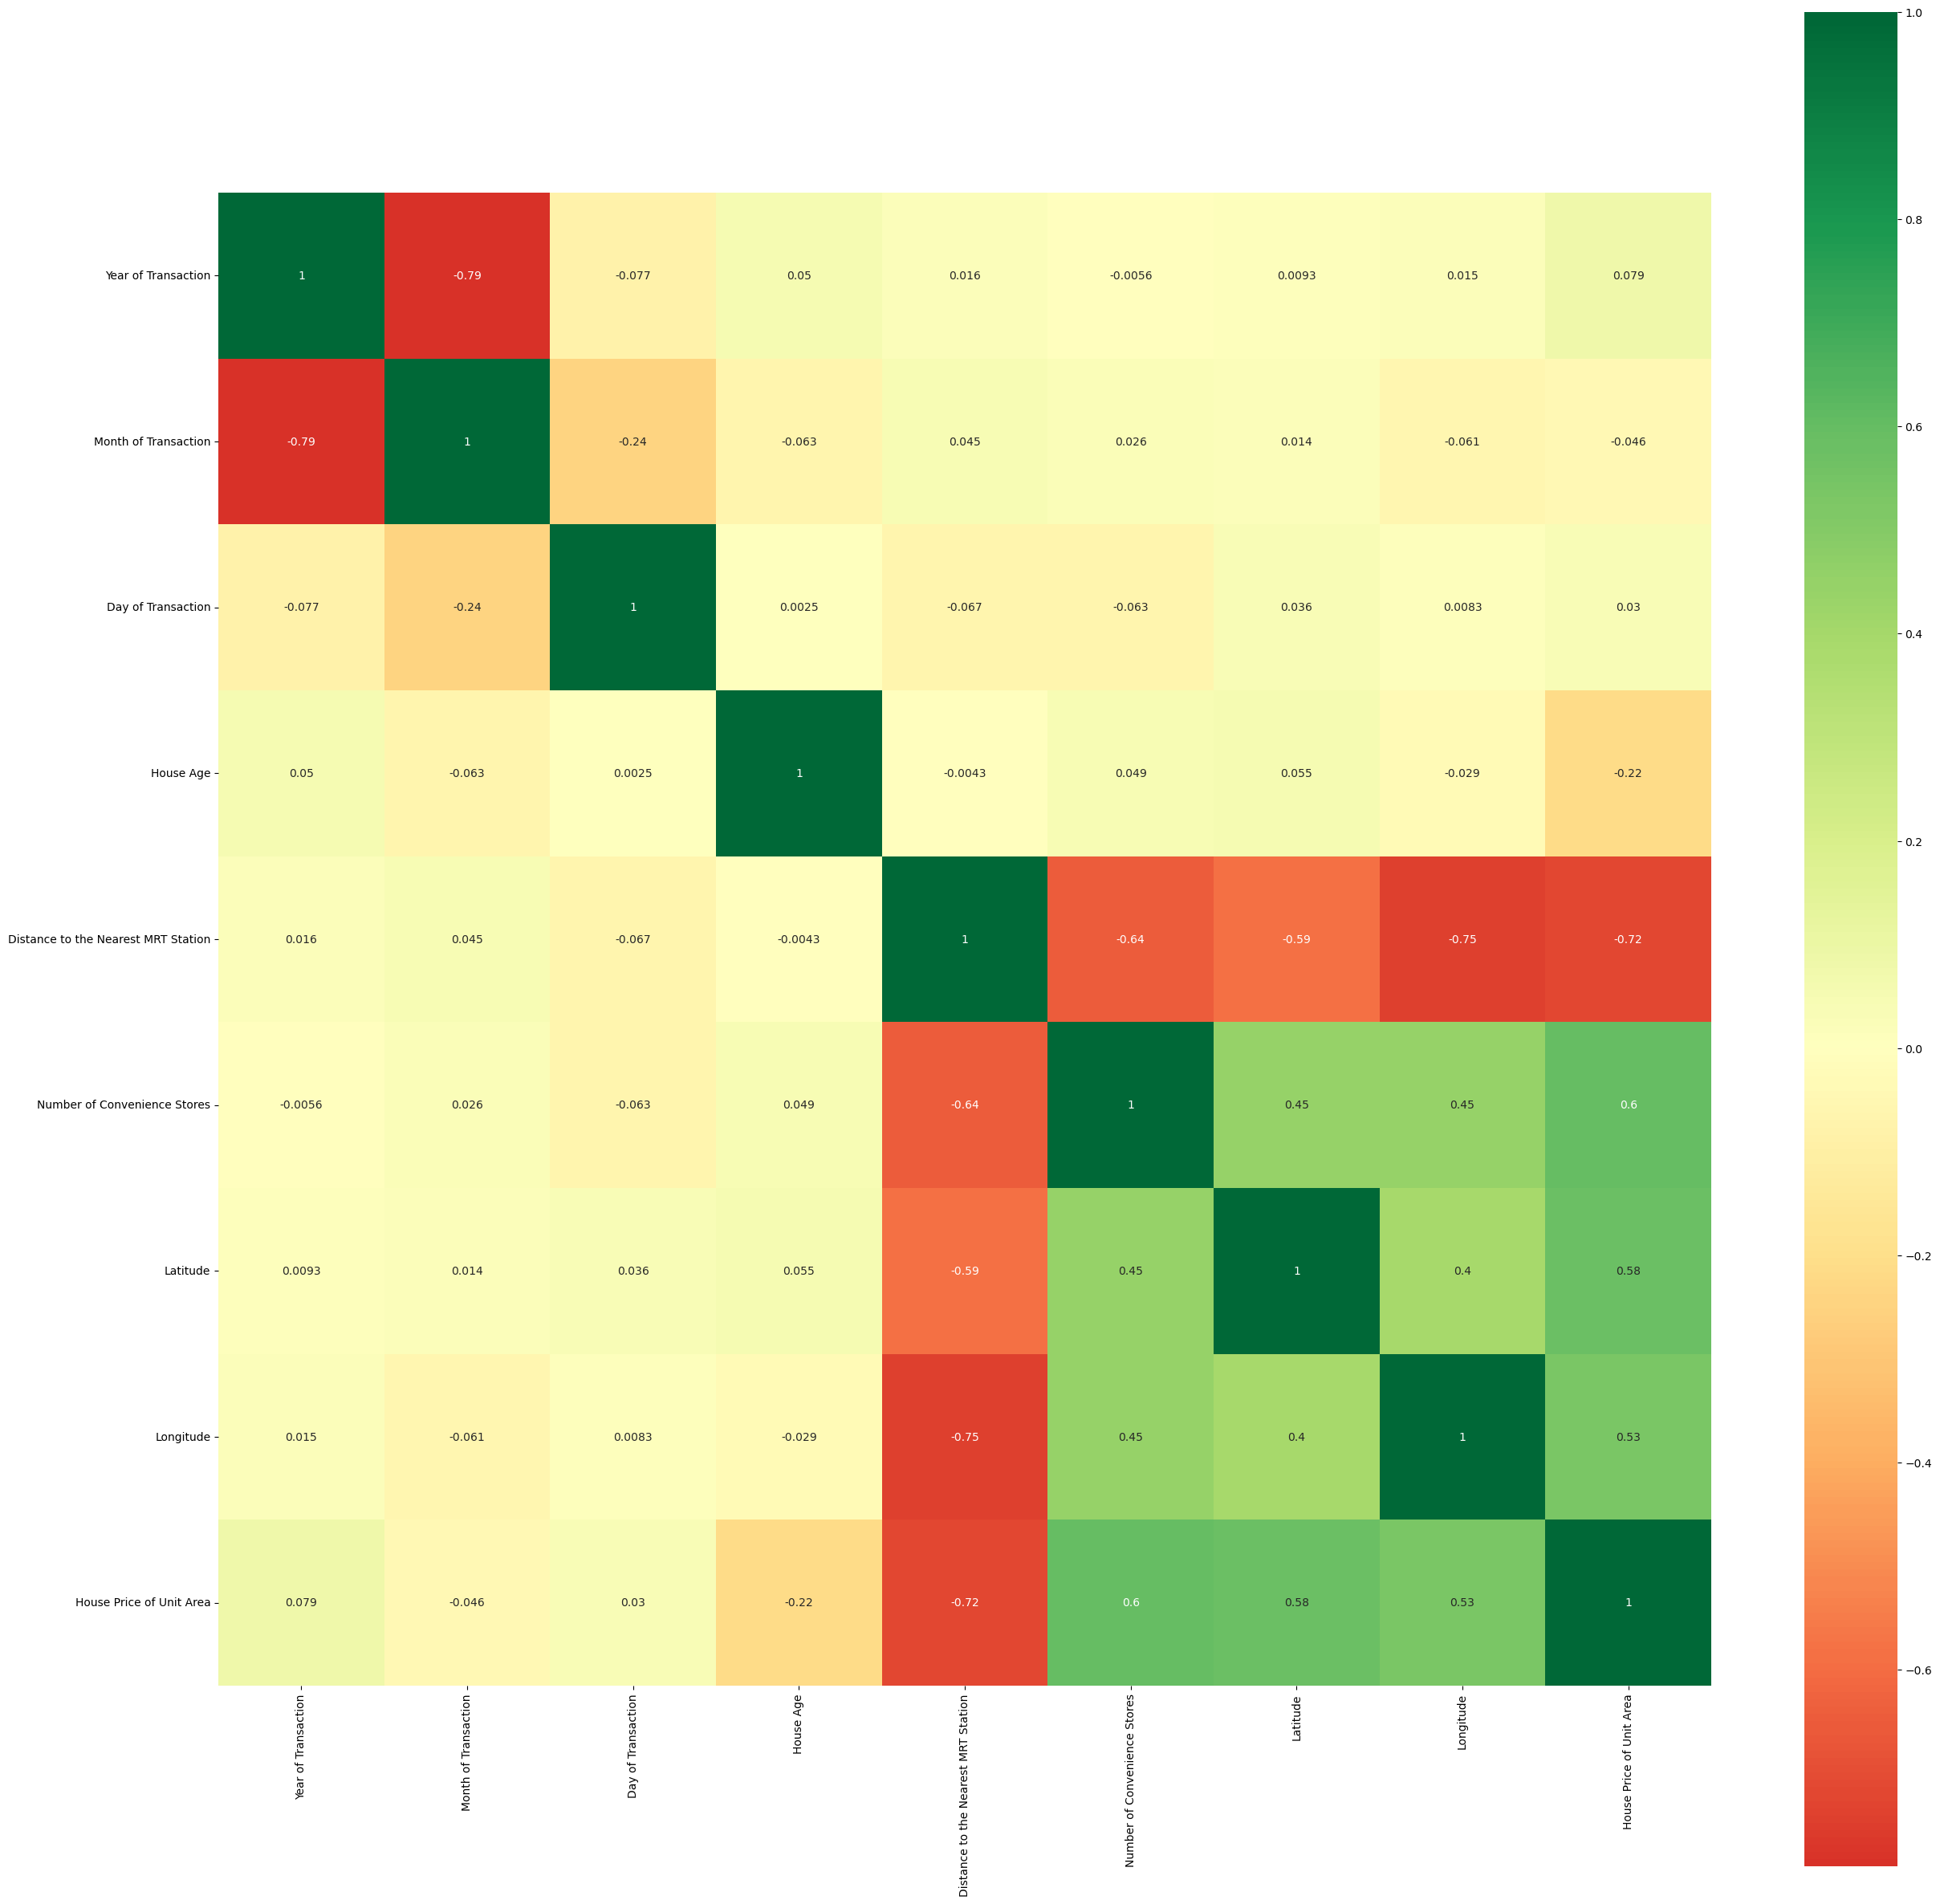

In [34]:
# Plot Correlation Matrix 

plt.figure(figsize = (30, 30))
# Plot the correlation matrix as a heatmap
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn', center=0, square=True)

### By Comparing our target feature House Price of Unit Area to other features in the dataset using our correlation matrix, we can say that;
### There is moderate positive correlation between House Price of Unit Area and Longitude
### There is moderate positive correlation between House Price of Unit Area and Latitude
### There is moderate positive correlation between House Price of Unit Area and Number of Convenience Stores
### There is high negative correlation between House Price of Unit Area and Distance to the Nearest MRT Station
### There is weak or no negative correlation between House Price of Unit Area and House Age
### There is weak or no positive correlation between House Price of Unit Area and Day of Transaction
### There is weak or no negative correlation between House Price of Unit Area and Month of Transaction
### There is weak or no positive correlation between House Price of Unit Area and Year of Transaction

In [35]:
# save cleaned csv file

df.to_csv("Cleaned Real estate.csv", index = False)

## Train and Test Model

In [36]:
# First we split the dataset into training and testing sets

# split dependent and independent features
X = df.drop("House Price of Unit Area", axis=1)
y = df["House Price of Unit Area"]


#split the data into a training set (80% of the data) and a test set (20% of the data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
X_train.shape

(331, 8)

In [38]:
X_test.shape

(83, 8)

In [39]:
# Create for loop to determine the best model for training and testing the data

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'Gradient Boosting Regressor': GradientBoostingRegressor()
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    results[name] = r2

# Print results
for name, r2 in results.items():
    print(f"{name}: R² Score = {r2}")

Linear Regression: R² Score = 0.7141594202735614
Decision Tree Regressor: R² Score = 0.7342430785138057
Random Forest Regressor: R² Score = 0.8265544775283088
Gradient Boosting Regressor: R² Score = 0.8093652045861921


### Since Random Forest Regression model has the highest R² Score, i will proceed to use it in the training and testing process

In [40]:
# Train our model using RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)

# create model and train model
model.fit(X_train, y_train)


y_pred = model.predict(X_train)
train_r2_score = r2_score(y_train, y_pred)

print(f"Training r2score:{train_r2_score}")

Training r2score:0.9573058640008548


### Since we have a high Training R² Score, we can say that this model performed very well predicting seen data

In [41]:
# test the model

y_test_pred = model.predict(X_test)
test_r2_score = r2_score(y_test, y_test_pred)
print(f"Testing r2score:{test_r2_score}")

Testing r2score:0.827558371799848


### Since we also have a high Testing R² Score, we can also say that this model will perform very well in predicting unseen data

## Creating a GUI for Testing the Model

In [42]:
# Define the function to make predictions

def predict_price():
    try:
        # Get user input
        year = int(entry_year.get())
        month = int(entry_month.get())
        day = int(entry_day.get())
        house_age = float(entry_house_age.get())
        distance = float(entry_distance.get())
        num_stores = int(entry_num_stores.get())
        latitude = float(entry_latitude.get())
        longitude = float(entry_longitude.get())

        # Validate month and day inputs
        if month < 1 or month > 12:
            messagebox.showerror("Input Error", "Month of Transaction must be between 1 and 12.")
            return
        if day < 1 or day > 31:
            messagebox.showerror("Input Error", "Day of Transaction must be between 1 and 31.")
            return

        # Prepare input for the model
        input_data = pd.DataFrame([[year, month, day, house_age, distance, num_stores, latitude, longitude]],
                                  columns=['Year of Transaction', 'Month of Transaction', 'Day of Transaction',
                                           'House Age', 'Distance to the Nearest MRT Station',
                                           'Number of Convenience Stores', 'Latitude', 'Longitude'])
        
        # Make prediction
        prediction = model.predict(input_data)
        result_label.config(text=f"Predicted House Price for Unit Area: ${prediction[0]:.2f}")
    
    except ValueError as e:
        messagebox.showerror("Input Error", f"Invalid input: {e}")

# Create the main window
root = tk.Tk()
root.title("House Price Prediction")
# set screen size
root.geometry("500x400")

# Create and place labels and entry widgets
tk.Label(root, text="Year of Transaction:", font=("Arial", 12)).grid(row=0, column=0, padx=10, pady=10, sticky='w')
entry_year = tk.Entry(root, font=("Arial", 12))
entry_year.grid(row=0, column=1, padx=10, pady=10)

tk.Label(root, text="Month of Transaction:", font=("Arial", 12)).grid(row=1, column=0, padx=10, pady=10, sticky='w')
entry_month = tk.Entry(root, font=("Arial", 12))
entry_month.grid(row=1, column=1, padx=10, pady=10)

tk.Label(root, text="Day of Transaction:", font=("Arial", 12)).grid(row=2, column=0, padx=10, pady=10, sticky='w')
entry_day = tk.Entry(root, font=("Arial", 12))
entry_day.grid(row=2, column=1, padx=10, pady=10)

tk.Label(root, text="House Age:", font=("Arial", 12)).grid(row=3, column=0, padx=10, pady=10, sticky='w')
entry_house_age = tk.Entry(root, font=("Arial", 12))
entry_house_age.grid(row=3, column=1, padx=10, pady=10)

tk.Label(root, text="Distance to the Nearest MRT Station:", font=("Arial", 12)).grid(row=4, column=0, padx=10, pady=10, sticky='w')
entry_distance = tk.Entry(root, font=("Arial", 12))
entry_distance.grid(row=4, column=1, padx=10, pady=10)

tk.Label(root, text="Number of Convenience Stores:", font=("Arial", 12)).grid(row=5, column=0, padx=10, pady=10, sticky='w')
entry_num_stores = tk.Entry(root, font=("Arial", 12))
entry_num_stores.grid(row=5, column=1, padx=10, pady=10)

tk.Label(root, text="Latitude:", font=("Arial", 12)).grid(row=6, column=0, padx=10, pady=10, sticky='w')
entry_latitude = tk.Entry(root, font=("Arial", 12))
entry_latitude.grid(row=6, column=1, padx=10, pady=10)

tk.Label(root, text="Longitude:", font=("Arial", 12)).grid(row=7, column=0, padx=10, pady=10, sticky='w')
entry_longitude = tk.Entry(root, font=("Arial", 12))
entry_longitude.grid(row=7, column=1, padx=10, pady=10)

# Predict button
predict_button = tk.Button(root, text="Predict", command=predict_price, font=("Arial", 12))
predict_button.grid(row=8, columnspan=2, padx=10, pady=20)

# Result label
result_label = tk.Label(root, text="", font=("Arial", 14), wraplength=400)
result_label.grid(row=9, columnspan=2, padx=10, pady=10)

# Run the application
root.mainloop()